In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)



In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

c:\Users\aluko\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.945980e+07,1.945980e+07,False,NaN,1,NaN,NaN,None,2023-08-17T06:30:00.000Z,28643.826773,1.640587e+10,23.0446,0.097000,-1.645176,-2.936466,-4.724830,7.880009,6.472747,5.574031e+11,49.0138,6.015204e+11,None,2023-08-17T06:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 06:31:31.839771
1,1027,Ethereum,ETH,ethereum,7235,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201359e+08,1.201359e+08,True,NaN,2,NaN,NaN,None,2023-08-17T06:30:00.000Z,1799.651934,5.492263e+09,14.9954,0.093398,-1.185534,-2.741506,-5.640782,4.070008,-0.348797,2.162027e+11,19.0123,2.162027e+11,None,2023-08-17T06:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 06:31:31.839771
2,825,Tether USDt,USDT,tether,59544,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.301725e+10,8.668426e+10,True,NaN,3,NaN,NaN,None,2023-08-17T06:29:00.000Z,0.998770,2.573019e+10,12.0985,-0.004942,0.008232,-0.022364,-0.139599,-0.105351,-0.135595,8.291513e+10,7.2905,8.657763e+10,None,2023-08-17T06:29:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-17 06:31:31.839771
3,1839,BNB,BNB,bnb,1571,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538524e+08,1.538524e+08,False,NaN,4,NaN,NaN,None,2023-08-17T06:30:00.000Z,231.414726,5.029361e+08,1.8793,0.235563,-1.406293,-4.729875,-4.677467,-5.690164,-25.316530,3.560370e+10,3.1309,3.560370e+10,None,2023-08-17T06:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 06:31:31.839771
4,52,XRP,XRP,xrp,1030,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.284187e+10,9.998850e+10,False,NaN,5,NaN,NaN,None,2023-08-17T06:30:00.000Z,0.589505,1.547512e+09,7.9894,-0.451265,-2.116261,-6.902966,-21.349939,22.624777,27.270085,3.115056e+10,2.7390,5.895053e+10,None,2023-08-17T06:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 06:31:31.839771
5,3408,USD Coin,USDC,usd-coin,13617,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.605795e+10,2.605795e+10,False,NaN,6,NaN,NaN,None,2023-08-17T06:29:00.000Z,1.000038,3.565699e+09,22.2355,-0.004020,-0.005032,0.007991,0.004663,-0.020730,0.001915,2.605895e+10,2.2920,2.605895e+10,None,2023-08-17T06:29:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-17 06:31:31.839771
6,2010,Cardano,ADA,cardano,890,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.504301e+10,3.607655e+10,False,NaN,7,NaN,NaN,None,2023-08-17T06:30:00.000Z,0.276886,2.540429e+08,26.6652,-0.091498,-0.724116,-6.989965,-10.455757,3.716723,-25.353622,9.702908e+09,0.8534,1.245986e+10,None,2023-08-17T06:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 06:31:31.839771
7,74,Dogecoin,DOGE,dogecoin,767,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.406231e+11,1.406231e+11,True,NaN,8,NaN,NaN,None,2023-08-17T06:30:00.000Z,0.068053,4.313121e+08,4.1951,0.012619,-3.691310,-9.925886,-2.329470,10.114906,-7.623782,9.569762e+09,0.8415,9.569762e+09,None,2023-08-17T06:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 06:31:31.839771
8,5426,Solana,SOL,solana,497,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN

In [11]:
import os


def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\aluko\desktop\API.csv'):
        df.to_csv(r'C:\Users\aluko\desktop\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\aluko\desktop\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

  


In [12]:
import os 
from time import time
from time import sleep

for i in range(5):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

c:\Users\aluko\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\aluko\AppData\Local\Temp\ipykernel_36344\1778971044.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
c:\Users\aluko\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


c:\Users\aluko\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\aluko\AppData\Local\Temp\ipykernel_36344\1778971044.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
c:\Users\aluko\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


KeyboardInterrupt: 

In [13]:
df72 = pd.read_csv(r'C:\Users\aluko\Desktop\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.945980e+07,1.945980e+07,False,NaN,1,NaN,NaN,NaN,2023-08-17T06:38:00.000Z,28634.880075,1.637383e+10,22.5643,0.091173,-1.756310,-2.989327,-4.532698,7.900780,6.436336,5.572290e+11,49.0175,6.013325e+11,NaN,2023-08-17T06:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 06:40:43.486372
1,1,1027,Ethereum,ETH,ethereum,7235,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201359e+08,1.201359e+08,True,NaN,2,NaN,NaN,NaN,2023-08-17T06:38:00.000Z,1798.616841,5.494881e+09,14.9709,0.020121,-1.299107,-2.742444,-5.467277,4.062826,-0.383685,2.160784e+11,19.0123,2.160784e+11,NaN,2023-08-17T06:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 06:40:43.486372
2,2,825,Tether USDt,USDT,tether,59544,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.301725e+10,8.668426e+10,True,NaN,3,NaN,NaN,NaN,2023-08-17T06:38:00.000Z,0.998821,2.569369e+10,11.7229,0.008801,0.010924,-0.006090,-0.142248,-0.093619,-0.135729,8.291934e+10,7.2939,8.658202e+10,NaN,2023-08-17T06:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-17 06:40:43.486372
3,3,1839,BNB,BNB,bnb,1571,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.538524e+08,1.538524e+08,False,NaN,4,NaN,NaN,NaN,2023-08-17T06:38:00.000Z,231.288853,5.024871e+08,1.6754,0.188110,-1.439645,-4.692211,-4.528175,-5.650943,-25.395599,3.558434e+10,3.1310,3.558434e+10,NaN,2023-08-17T06:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 06:40:43.486372
4,4,52,XRP,XRP,xrp,1030,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.284187e+10,9.998850e+10,False,NaN,5,NaN,NaN,NaN,2023-08-17T06:38:00.000Z,0.588818,1.536053e+09,6.2289,-0.510302,-2.167553,-6.949303,-20.891908,22.538708,27.024624,3.111423e+10,2.7377,5.888178e+10,NaN,2023-08-17T06:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 06:40:43.486372
5,5,3408,USD Coin,USDC,usd-coin,13617,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.605795e+10,2.605795e+10,False,NaN,6,NaN,NaN,NaN,2023-08-17T06:38:00.000Z,1.000075,3.565661e+09,22.3371,0.012581,0.001037,0.022170,0.003310,-0.001326,0.005265,2.605991e+10,2.2926,2.605991e+10,NaN,2023-08-17T06:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-17 06:40:43.486372
6,6,2010,Cardano,ADA,cardano,890,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.504301e+10,3.607655e+10,False,NaN,7,NaN,NaN,NaN,2023-08-17T06:38:00.000Z,0.276720,2.541524e+08,26.4206,-0.267718,-0.896495,-7.016592,-10.140723,3.669402,-25.478506,9.697110e+09,0.8531,1.245241e+10,NaN,2023-08-17T06:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 06:40:43.486372
7,7,74,Dogecoin,DOGE,dogecoin,767,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.406231e+11,1.406231e+11,True,NaN,8,NaN,NaN,NaN,2023-08-17T06:38:00.000Z,0.067985,4.308645e+08,4.0905,-0.076766,-3.791434,-10.051404,-1.997028,10.023637,-7.709669,9.560249e+09,0.8410,9.560249e+09,NaN,2023-08-17T06:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 06:40:43.486372
8,8,5426,Solana,SOL,solana,497,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'c

In [14]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.945980e+07,1.945980e+07,False,NaN,1,NaN,NaN,None,2023-08-17T06:40:00.000Z,28648.564655,1.638103e+10,22.5158,0.138310,-1.731197,-2.936500,-4.496713,7.932607,6.485692,5.574953e+11,49.0433,6.016199e+11,None,2023-08-17T06:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 06:41:43.691388
1,1027,Ethereum,ETH,ethereum,7235,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201359e+08,1.201359e+08,True,NaN,2,NaN,NaN,None,2023-08-17T06:40:00.000Z,1799.556922,5.492471e+09,14.7146,0.061030,-1.278575,-2.687487,-5.357172,4.114329,-0.337760,2.161913e+11,19.0222,2.161913e+11,None,2023-08-17T06:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 06:41:43.691388
2,825,Tether USDt,USDT,tether,59544,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.301725e+10,8.668426e+10,True,NaN,3,NaN,NaN,None,2023-08-17T06:40:00.000Z,0.998774,2.568545e+10,11.5918,0.001882,0.003812,-0.006335,-0.155553,-0.102428,-0.137179,8.291544e+10,7.2953,8.657796e+10,None,2023-08-17T06:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-17 06:41:43.691388
3,1839,BNB,BNB,bnb,1571,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538524e+08,1.538524e+08,False,NaN,4,NaN,NaN,None,2023-08-17T06:40:00.000Z,231.348912,5.032886e+08,1.7813,0.215305,-1.440679,-4.637270,-4.446544,-5.594630,-25.382704,3.559358e+10,3.1318,3.559358e+10,None,2023-08-17T06:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 06:41:43.691388
4,52,XRP,XRP,xrp,1030,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.284187e+10,9.998850e+10,False,NaN,5,NaN,NaN,None,2023-08-17T06:40:00.000Z,0.588597,1.534147e+09,5.8562,-0.491418,-2.396323,-6.860414,-20.598737,22.512409,26.820422,3.110259e+10,2.7367,5.885975e+10,None,2023-08-17T06:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 06:41:43.691388
5,3408,USD Coin,USDC,usd-coin,13617,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.605795e+10,2.605795e+10,False,NaN,6,NaN,NaN,None,2023-08-17T06:40:00.000Z,1.000008,3.567779e+09,22.2881,0.002708,-0.010443,0.011146,-0.012778,-0.009871,-0.001611,2.605816e+10,2.2925,2.605816e+10,None,2023-08-17T06:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-17 06:41:43.691388
6,2010,Cardano,ADA,cardano,890,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.504301e+10,3.607655e+10,False,NaN,7,NaN,NaN,None,2023-08-17T06:40:00.000Z,0.276752,2.540589e+08,26.2565,-0.259801,-0.932777,-6.977907,-9.912328,3.717126,-25.431776,9.698219e+09,0.8532,1.245383e+10,None,2023-08-17T06:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 06:41:43.691388
7,74,Dogecoin,DOGE,dogecoin,767,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.406231e+11,1.406231e+11,True,NaN,8,NaN,NaN,None,2023-08-17T06:40:00.000Z,0.068002,4.318636e+08,4.2408,-0.058178,-3.806399,-9.968822,-1.579123,10.038463,-7.660242,9.562648e+09,0.8412,9.562648e+09,None,2023-08-17T06:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 06:41:43.691388
8,5426,Solana,SOL,solana,497,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN

In [15]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [16]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.13831,-1.73120,-2.93650,-4.49671,7.93261,6.48569
Ethereum,0.06103,-1.27858,-2.68749,-5.35717,4.11433,-0.33776
Tether USDt,0.00188,0.00381,-0.00634,-0.15555,-0.10243,-0.13718
BNB,0.21531,-1.44068,-4.63727,-4.44654,-5.59463,-25.38270
XRP,-0.49142,-2.39632,-6.86041,-20.59874,22.51241,26.82042
USD Coin,0.00271,-0.01044,0.01115,-0.01278,-0.00987,-0.00161
Cardano,-0.25980,-0.93278,-6.97791,-9.91233,3.71713,-25.43178
Dogecoin,-0.05818,-3.80640,-9.96882,-1.57912,10.03846,-7.66024
Solana,-0.17343,-1.17551,-4.33737,-11.50140,49.30589,13.67370


In [17]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.13831
             quote.USD.percent_change_24h    -1.73120
             quote.USD.percent_change_7d     -2.93650
             quote.USD.percent_change_30d    -4.49671
             quote.USD.percent_change_60d     7.93261
             quote.USD.percent_change_90d     6.48569
Ethereum     quote.USD.percent_change_1h      0.06103
             quote.USD.percent_change_24h    -1.27858
             quote.USD.percent_change_7d     -2.68749
             quote.USD.percent_change_30d    -5.35717
             quote.USD.percent_change_60d     4.11433
             quote.USD.percent_change_90d    -0.33776
Tether USDt  quote.USD.percent_change_1h      0.00188
             quote.USD.percent_change_24h     0.00381
             quote.USD.percent_change_7d     -0.00634
             quote.USD.percent_change_30d    -0.15555
             quote.USD.percent_change_60d    -0.10243
             quote.USD.percent_change_90

In [18]:
type(df4)

pandas.core.series.Series

In [19]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.13831
            quote.USD.percent_change_24h  -1.73120
            quote.USD.percent_change_7d   -2.93650
            quote.USD.percent_change_30d  -4.49671
            quote.USD.percent_change_60d   7.93261
            quote.USD.percent_change_90d   6.48569
Ethereum    quote.USD.percent_change_1h    0.06103
            quote.USD.percent_change_24h  -1.27858
            quote.USD.percent_change_7d   -2.68749
            quote.USD.percent_change_30d  -5.35717
            quote.USD.percent_change_60d   4.11433
            quote.USD.percent_change_90d  -0.33776
Tether USDt quote.USD.percent_change_1h    0.00188
            quote.USD.percent_change_24h   0.00381
            quote.USD.percent_change_7d   -0.00634
            quote.USD.percent_change_30d  -0.15555
            quote.USD.percent_change_60d  -0.10243
            quote.USD.percent_change_90d  -0.13718
BNB         quote.USD.percent_change_1h    0.21531
            quote.USD.percent_change_24h  -1.44068
            quote.USD.percent_change_7d   -4.63727
            quote.USD.percent_change_30d  -4.44654
            quote.USD.percent_change_60d  -5.59463
            quote.USD.percent_change_90d -25.38270
XRP         quote.USD.percent_change_1h   -0.49142
            quote.USD.percent_change_24h  -2.39632
            quote.USD.percent_change_7d   -6.86041
            quote.USD.percent_change_30d -20.59874
            quote.USD.percent_change_60d  22.51241
            quote.USD.percent_change_90d  26.82042
USD Coin    quote.USD.percent_change_1h    0.00271
            quote.USD.percent_change_24h  -0.01044
            quote.USD.percent_change_7d    0.01115
            quote.USD.percent_change_30d  -0.01278
            quote.USD.percent_change_60d  -0.00987
            quote.USD.percent_change_90d  -0.00161
Cardano     quote.USD.percent_change_1h   -0.25980
            quote.USD.percent_change_24h  -0.93278
            quote.USD.percent_change_7d   -6.97791
            quote.USD.percent_change_30d  -9.91233
            quote.USD.percent_change_60d   3.71713
            quote.USD.percent_change_90d -25.43178
Dogecoin    quote.USD.percent_change_1h   -0.05818
            quote.USD.percent_change_24h  -3.80640
            quote.USD.percent_change_7d   -9.96882
            quote.USD.percent_change_30d  -1.57912
            quote.USD.percent_change_60d  10.03846
            quote.USD.percent_change_90d  -7.66024
Solana      quote.USD.percent_change_1h   -0.17343
            quote.USD.percent_change_24h  -1.17551
            quote.USD.percent_change_7d   -4.33737
            quote.USD.percent_change_30d -11.50140
            quote.USD.percent_change_60d  49.30589
            quote.USD.percent_change_90d  13.67370
TRON        quote.USD.percent_change_1h   -0.51900
            quote.USD.percent_change_24h  -2.30285
            quote.USD.percent_change_7d   -2.82020
            quote.USD.percent_change_30d  -7.47340
            quote.USD.percent_change_60d   3.91614
            quote.USD.percent_change_90d   6.14534
Polygon     quote.USD.percent_change_1h   -0.02295
            quote.USD.percent_change_24h  -1.30569
            quote.USD.percent_change_7d   -9.33398
            quote.USD.percent_change_30d -18.78875
            quote.USD.percent_change_60d   2.01205
            quote.USD.percent_change_90d -28.88354
Polkadot    quote.USD.percent_change_1h   -0.56631
            quote.USD.percent_change_24h  -0.66070
            quote.USD.percent_change_7d   -5.32296
            quote.USD.percent_change_30d  -9.39648
            quote.USD.percent_change_60d   4.93417
            quote.USD.percent_change_90d -11.31522
Litecoin    quote.USD.percent_change_1h    0.15214
            quote.USD.percent_change_24h  -3.69028
            quote.USD.percent_change_7d   -9.80543
            quote.USD.percent_change_30d -17.44493
            quote.USD.percent_change_60d  -2.14935
            quo

In [32]:
df5.count()

values    90
dtype: int64

In [34]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.13831
1,Bitcoin,quote.USD.percent_change_24h,-1.73120
2,Bitcoin,quote.USD.percent_change_7d,-2.93650
3,Bitcoin,quote.USD.percent_change_30d,-4.49671
4,Bitcoin,quote.USD.percent_change_60d,7.93261
5,Bitcoin,quote.USD.percent_change_90d,6.48569
6,Ethereum,quote.USD.percent_change_1h,0.06103
7,Ethereum,quote.USD.percent_change_24h,-1.27858
8,Ethereum,quote.USD.percent_change_7d,-2.68749
9,Ethereum,quote.USD.percent_change_30d,-5.35717


In [35]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.13831
1,Bitcoin,quote.USD.percent_change_24h,-1.73120
2,Bitcoin,quote.USD.percent_change_7d,-2.93650
3,Bitcoin,quote.USD.percent_change_30d,-4.49671
4,Bitcoin,quote.USD.percent_change_60d,7.93261
5,Bitcoin,quote.USD.percent_change_90d,6.48569
6,Ethereum,quote.USD.percent_change_1h,0.06103
7,Ethereum,quote.USD.percent_change_24h,-1.27858
8,Ethereum,quote.USD.percent_change_7d,-2.68749
9,Ethereum,quote.USD.percent_change_30d,-5.35717


In [36]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.13831
1,Bitcoin,24h,-1.73120
2,Bitcoin,7d,-2.93650
3,Bitcoin,30d,-4.49671
4,Bitcoin,60d,7.93261
5,Bitcoin,90d,6.48569
6,Ethereum,quote.USD.percent_change_1h,0.06103
7,Ethereum,24h,-1.27858
8,Ethereum,7d,-2.68749
9,Ethereum,30d,-5.35717


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

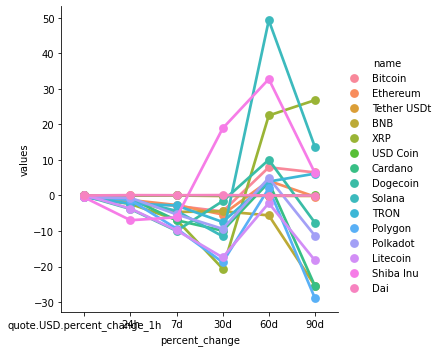

In [37]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [40]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]

df10

,name,quote.USD.price,timestamp
0,Bitcoin,28648.56465,2023-08-17 06:41:43.691388
1,Ethereum,1799.55692,2023-08-17 06:41:43.691388
2,Tether USDt,0.99877,2023-08-17 06:41:43.691388
3,BNB,231.34891,2023-08-17 06:41:43.691388
4,XRP,0.58860,2023-08-17 06:41:43.691388
5,USD Coin,1.00001,2023-08-17 06:41:43.691388
6,Cardano,0.27675,2023-08-17 06:41:43.691388
7,Dogecoin,0.06800,2023-08-17 06:41:43.691388
8,Solana,23.22761,2023-08-17 06:41:43.691388
9,TRON,0.07458,2023-08-17 06:41:43.691388


<AxesSubplot:xlabel='name', ylabel='quote.USD.price'>

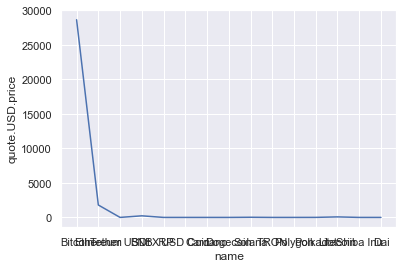

In [44]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='name', y='quote.USD.price', data = df10)